In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import warnings
warnings.filterwarnings('ignore')


from sklearn import metrics

from scipy.special import legendre
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import seaborn as sns

### Reading CSV

In [4]:
df = pd.read_csv('C:/Users/ferna/Desktop/UTEC/Tesis 2/codigo/github_info/all_matches_versionfinal_apuestas.csv')

In [5]:
len(df)

49834

In [6]:
df = df.sort_values(by='tourney_date')

In [7]:
df.describe()

,draw_size,match_num,Player1_id,Player1_seed,Player1_ht,Player1_age,Player2_id,Player2_seed,Player2_ht,Player2_age,...,promedio_ultimas_5_svpt_Player2,promedio_ultimas_5_1stIn_Player2,promedio_ultimas_5_1stWon_Player2,promedio_ultimas_5_2ndWon_Player2,promedio_ultimas_5_SvGms_Player2,promedio_ultimas_5_bpSaved_Player2,promedio_ultimas_5_bpFaced_Player2,y,Player1_odds,Player2_odds
count,49834.000000,49834.000000,49834.000000,17998.000000,49495.000000,49833.000000,49834.000000,18203.000000,49479.000000,49833.000000,...,49831.000000,49831.000000,49831.000000,49831.000000,49831.000000,49831.000000,49831.000000,49834.000000,597.000000,597.000000
mean,60.926677,126.177489,110209.323354,7.977998,186.346015,26.880391,110346.970221,8.065813,186.356171,26.857765,...,79.476779,48.648653,34.670879,15.636193,12.426802,4.077198,6.743223,0.500000,1.817060,4.826486
std,39.194492,143.567746,19899.577101,7.166253,6.875619,4.027667,20335.998206,7.161990,6.881464,4.047139,...,15.079976,10.334446,7.870235,3.856326,2.268890,1.593115,2.320984,0.500005,1.559552,5.305401
min,8.000000,1.000000,100644.000000,1.000000,168.000000,15.400000,100644.000000,1.000000,163.000000,15.500000,...,8.000000,7.000000,3.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.002000
25%,32.000000,18.000000,103970.000000,3.000000,183.000000,24.000000,103970.000000,3.000000,183.000000,23.900000,...,69.000000,41.400000,29.200000,13.000000,10.800000,3.000000,5.200000,0.000000,1.120000,1.800000
50%,32.000000,50.000000,104731.000000,6.000000,185.000000,26.700000,104735.000000,6.000000,185.000000,26.700000,...,77.800000,47.400000,33.800000,15.400000,12.200000,4.000000,6.600000,0.500000,1.400000,3.000000
75%,96.000000,272.000000,105668.000000,10.000000,190.000000,29.600000,105657.000000,10.000000,190.000000,29.600000,...,88.200000,54.600000,39.000000,18.000000,13.600000,5.000000,8.200000,1.000000,2.000000,5.500000
max,128.000000,1701.000000,211776.000000,33.000000,211.000000,43.000000,212021.000000,33.000000,211.000000,44.000000,...,193.000000,125.000000,95.000000,44.000000,29.600000,15.000000,22.000000,1.000000,29.000000,51.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49834 entries, 0 to 49833
Data columns (total 83 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   tourney_id                          49834 non-null  object 
 1   tourney_name                        49834 non-null  object 
 2   surface                             49834 non-null  object 
 3   draw_size                           49834 non-null  int64  
 4   tourney_level                       49834 non-null  object 
 5   tourney_date                        49834 non-null  object 
 6   match_num                           49834 non-null  int64  
 7   Player1_id                          49834 non-null  int64  
 8   Player1_seed                        17998 non-null  float64
 9   Player1_entry                       9193 non-null   object 
 10  Player1_name                        49834 non-null  object 
 11  Player1_hand                        49834

In [9]:
df.columns

Index(['tourney_id', 'tourney_name', 'surface', 'draw_size', 'tourney_level',
       'tourney_date', 'match_num', 'Player1_id', 'Player1_seed',
       'Player1_entry', 'Player1_name', 'Player1_hand', 'Player1_ht',
       'Player1_ioc', 'Player1_age', 'Player2_id', 'Player2_seed',
       'Player2_entry', 'Player2_name', 'Player2_hand', 'Player2_ht',
       'Player2_ioc', 'Player2_age', 'score', 'best_of', 'round', 'minutes',
       'w_ace', 'w_df', 'w_svpt', 'w_1stIn', 'w_1stWon', 'w_2ndWon', 'w_SvGms',
       'w_bpSaved', 'w_bpFaced', 'l_ace', 'l_df', 'l_svpt', 'l_1stIn',
       'l_1stWon', 'l_2ndWon', 'l_SvGms', 'l_bpSaved', 'l_bpFaced',
       'Player1_rank', 'Player1_rank_points', 'Player2_rank',
       'Player2_rank_points', 'matches_count_superficie_Player1',
       'winner_superficie_Player1', 'matches_count_superficie_Player2',
       'winner_superficie_Player2', 'matches_count_tourneyname_Player1',
       'winner_tourneyname_Player1', 'matches_count_tourneyname_Player2',
      

In [10]:
revision_apuestas=df.copy()

### Separating  Features


In [11]:
players = ['Player1_id','Player1_name','Player2_id','Player2_name']

to_drop = ['match_num','tourney_id','tourney_date','score','minutes','w_ace','w_df',
            'w_svpt','w_1stIn','w_1stWon','w_2ndWon','w_SvGms','w_bpSaved','w_bpFaced','l_ace','l_df','l_svpt','l_1stIn',
            'l_1stWon','l_2ndWon','l_SvGms','l_bpSaved','l_bpFaced','Player1_odds','Player2_odds']

cat_cols = ['tourney_name','surface','draw_size','tourney_level','Player1_entry','Player1_hand','Player1_ioc',
            'Player2_entry','Player2_hand','Player2_ioc','best_of','round']

num_cols = ['Player1_seed','Player1_ht','Player1_age','Player1_rank','Player1_rank_points',
            'Player2_seed','Player2_ht','Player2_age','Player2_rank','Player2_rank_points',
            'matches_count_superficie_Player1',
       'winner_superficie_Player1', 'matches_count_superficie_Player2',
       'winner_superficie_Player2', 'matches_count_tourneyname_Player1',
       'winner_tourneyname_Player1', 'matches_count_tourneyname_Player2',
       'winner_tourneyname_Player2', 'matches_count_tourneylevel_Player1',
       'winner_tourneylevel_Player1', 'matches_count_tourneylevel_Player2',
       'winner_tourneylevel_Player2', 'winner',
       'promedio_ultimas_5_ace_Player1', 'promedio_ultimas_5_df_Player1',
       'promedio_ultimas_5_svpt_Player1', 'promedio_ultimas_5_1stIn_Player1',
       'promedio_ultimas_5_1stWon_Player1',
       'promedio_ultimas_5_2ndWon_Player1', 'promedio_ultimas_5_SvGms_Player1',
       'promedio_ultimas_5_bpSaved_Player1',
       'promedio_ultimas_5_bpFaced_Player1', 'promedio_ultimas_5_ace_Player2',
       'promedio_ultimas_5_df_Player2', 'promedio_ultimas_5_svpt_Player2',
       'promedio_ultimas_5_1stIn_Player2', 'promedio_ultimas_5_1stWon_Player2',
       'promedio_ultimas_5_2ndWon_Player2', 'promedio_ultimas_5_SvGms_Player2',
       'promedio_ultimas_5_bpSaved_Player2',
       'promedio_ultimas_5_bpFaced_Player2']

In [12]:
len(df)

49834

### Dropping Irrelevant Features

In [13]:
df = df.drop(to_drop, axis=1)
df = df.drop(players, axis=1)

### Replacing Missing Values

In [14]:
for i in cat_cols:
    df[i] = df[i].replace(np.NaN, df[i].mode()[0])

In [15]:
for i in num_cols:
    print(i)
    df[i] = df[i].replace(np.NaN,df[i].mean())

Player1_seed
Player1_ht
Player1_age
Player1_rank
Player1_rank_points
Player2_seed
Player2_ht
Player2_age
Player2_rank
Player2_rank_points
matches_count_superficie_Player1
winner_superficie_Player1
matches_count_superficie_Player2
winner_superficie_Player2
matches_count_tourneyname_Player1
winner_tourneyname_Player1
matches_count_tourneyname_Player2
winner_tourneyname_Player2
matches_count_tourneylevel_Player1
winner_tourneylevel_Player1
matches_count_tourneylevel_Player2
winner_tourneylevel_Player2
winner
promedio_ultimas_5_ace_Player1
promedio_ultimas_5_df_Player1
promedio_ultimas_5_svpt_Player1
promedio_ultimas_5_1stIn_Player1
promedio_ultimas_5_1stWon_Player1
promedio_ultimas_5_2ndWon_Player1
promedio_ultimas_5_SvGms_Player1
promedio_ultimas_5_bpSaved_Player1
promedio_ultimas_5_bpFaced_Player1
promedio_ultimas_5_ace_Player2
promedio_ultimas_5_df_Player2
promedio_ultimas_5_svpt_Player2
promedio_ultimas_5_1stIn_Player2
promedio_ultimas_5_1stWon_Player2
promedio_ultimas_5_2ndWon_Player

### convert categorical data to numeric

In [16]:
def convertCatToNum(dff):
    dff_new = pd.get_dummies(dff, columns=cat_cols,drop_first=True) 
    return dff_new

In [17]:
df = convertCatToNum(df)
df.head()

,Player1_seed,Player1_ht,Player1_age,Player2_seed,Player2_ht,Player2_age,Player1_rank,Player1_rank_points,Player2_rank,Player2_rank_points,...,best_of_5,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,7.977998,180.0,24.7,3.000000,180.0,28.6,119.0,374.0,42.0,885.0,...,0,0,0,0,0,0,1,0,0,0
68,1.000000,185.0,23.4,8.000000,178.0,23.5,1.0,6335.0,28.0,1085.0,...,0,0,0,0,0,0,0,0,0,1
67,8.000000,178.0,23.5,8.065813,180.0,22.7,28.0,1085.0,44.0,863.0,...,0,0,0,0,0,1,0,0,0,0
66,7.977998,185.0,26.6,8.065813,175.0,25.3,115.0,382.0,98.0,437.0,...,0,0,0,0,0,0,1,0,0,0
65,7.977998,178.0,28.9,8.000000,180.0,26.4,121.0,364.0,94.0,451.0,...,0,0,0,0,0,1,0,0,0,0


### Normalize numeric features

In [18]:
def normalize(dff,col_name_list):
    result = dff.copy()
    for feature_name in col_name_list:
        max_value = dff[feature_name].max()
        min_value = dff[feature_name].min()
        result[feature_name] = (dff[feature_name] - min_value) / (max_value - min_value)
    return result


df = normalize(df,num_cols)
df.head()

,Player1_seed,Player1_ht,Player1_age,Player2_seed,Player2_ht,Player2_age,Player1_rank,Player1_rank_points,Player2_rank,Player2_rank_points,...,best_of_5,round_ER,round_F,round_QF,round_R128,round_R16,round_R32,round_R64,round_RR,round_SF
0,0.218062,0.279070,0.336957,0.062500,0.354167,0.459649,0.054680,0.022007,0.019114,0.052156,...,0,0,0,0,0,0,1,0,0,0
68,0.000000,0.395349,0.289855,0.218750,0.312500,0.280702,0.000000,0.373709,0.012587,0.063957,...,0,0,0,0,0,0,0,0,0,1
67,0.218750,0.232558,0.293478,0.220807,0.354167,0.252632,0.012512,0.063957,0.020047,0.050858,...,0,0,0,0,0,1,0,0,0,0
66,0.218062,0.395349,0.405797,0.220807,0.250000,0.343860,0.052827,0.022479,0.045221,0.025724,...,0,0,0,0,0,0,1,0,0,0
65,0.218062,0.232558,0.489130,0.218750,0.354167,0.382456,0.055607,0.021417,0.043357,0.026550,...,0,0,0,0,0,1,0,0,0,0


## Modelamiento

In [19]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPRegressor

In [20]:
Y = pd.DataFrame(df['y'])
df = df.drop(['y'], axis=1)
X = df
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

## Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
# Define model
model = LogisticRegression()

# define evaluation
#gkf = GroupKFold(n_splits=3) if not spec as cv= in the randomized search default is 5 fold cv

# define search space
param_grid = {
    'C' : np.logspace(0, 4, num=10),
    'penalty' : ['l1', 'l2'],
    'solver' : ['liblinear', 'sag']
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.8240682541297529
Best Hyperparameters: {'solver': 'sag', 'penalty': 'l2', 'C': 464.15888336127773}


In [22]:
# Prediction with best model from random search 
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      8200
           1       0.82      0.82      0.82      8246

    accuracy                           0.82     16446
   macro avg       0.82      0.82      0.82     16446
weighted avg       0.82      0.82      0.82     16446



## Agregando la probabilidad a al df inicial

In [23]:
revision_apuestas['predicted_prob'] = best_random.predict_proba(X)[:, 1]

In [24]:
revision_apuestas

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,Player1_id,Player1_seed,Player1_entry,...,promedio_ultimas_5_1stIn_Player2,promedio_ultimas_5_1stWon_Player2,promedio_ultimas_5_2ndWon_Player2,promedio_ultimas_5_SvGms_Player2,promedio_ultimas_5_bpSaved_Player2,promedio_ultimas_5_bpFaced_Player2,y,Player1_odds,Player2_odds,predicted_prob
0,2005-891,Chennai,Hard,32,A,2005-01-03,5,103535,NaN,NaN,...,41.000000,23.0,11.0,8.00,10.000000,16.00,1,NaN,NaN,0.837939
68,2005-451,Doha,Hard,32,A,2005-01-03,29,103819,1.0,NaN,...,40.000000,26.0,16.0,10.00,3.000000,5.00,1,NaN,NaN,0.838423
67,2005-451,Doha,Hard,32,A,2005-01-03,20,103786,8.0,NaN,...,47.000000,38.0,7.0,10.00,5.000000,5.00,1,NaN,NaN,0.765903
66,2005-891,Chennai,Hard,32,A,2005-01-03,6,103181,NaN,NaN,...,36.666667,28.0,20.0,12.00,4.333333,7.00,0,NaN,NaN,0.010906
65,2005-891,Chennai,Hard,32,A,2005-01-03,21,102720,NaN,NaN,...,44.000000,29.5,14.0,12.50,4.000000,8.00,1,NaN,NaN,0.972862
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49740,2023-560,Us Open,Hard,128,G,2023-08-28,194,111513,32.0,NaN,...,41.200000,26.0,16.6,11.80,5.600000,9.80,1,NaN,NaN,0.748563
49739,2023-560,Us Open,Hard,128,G,2023-08-28,212,208286,NaN,NaN,...,51.000000,38.0,20.0,13.40,4.200000,5.00,0,NaN,NaN,0.037210
49738,2023-560,Us Open,Hard,128,G,2023-08-28,113,104527,NaN,NaN,...,42.200000,27.8,19.0,12.00,4.000000,7.40,1,NaN,NaN,0.972064
49769,2023-560,Us Open,Hard,128,G,2023-08-28,173,202104,NaN,NaN,...,51.600000,38.6,10.8,11.80,5.600000,7.80,1,NaN,NaN,0.644562


In [25]:
simulacion = revision_apuestas[revision_apuestas['Player1_odds'].notnull()]
simulacion=simulacion[['tourney_date','tourney_name','Player1_name', 'Player2_name','y', 'Player1_odds','Player2_odds', 'predicted_prob']]

In [29]:
simulacion['prob_casa_Player1']=1/simulacion['Player1_odds']
simulacion['prob_casa_Player2']=1/simulacion['Player2_odds']

In [30]:
simulacion['prob_propio_Player1']=simulacion['predicted_prob']
simulacion['prob_propio_Player2']=1-simulacion['predicted_prob']

In [31]:
simulacion['apuesta_player1'] = (simulacion['prob_propio_Player1'] > simulacion['prob_casa_Player1']).astype(int)
simulacion['apuesta_player2'] = (simulacion['prob_propio_Player2'] > simulacion['prob_casa_Player2']).astype(int)

In [32]:
apuestas_seleccionadas = simulacion[((simulacion['apuesta_player1']==1)&(simulacion['apuesta_player2']==0))|((simulacion['apuesta_player1']==0)&(simulacion['apuesta_player2']==1))]
len(apuestas_seleccionadas)

548

In [34]:
apuestas_seleccionadas[apuestas_seleccionadas['apuesta_player2']==1]

,tourney_date,tourney_name,Player1_name,Player2_name,y,Player1_odds,Player2_odds,predicted_prob,prob_casa_Player1,prob_casa_Player2,prob_propio_Player1,prob_propio_Player2,apuesta_player1,apuesta_player2
178,2005-01-17,Australian Open,Calleri A.,Mirnyi M.,1,2.37,1.53,0.148349,0.421941,0.653595,0.148349,0.851651,0,1
3118,2006-01-16,Australian Open,Ginepri R.,Melzer J.,1,1.36,3.00,0.309153,0.735294,0.333333,0.309153,0.690847,0,1
5323,2006-08-28,US Open,Massu N.,Sanguinetti D.,1,1.44,2.62,0.439917,0.694444,0.381679,0.439917,0.560083,0,1
6044,2007-01-15,Australian Open,Arthurs W.,Koubek S.,1,3.00,1.36,0.188682,0.333333,0.735294,0.188682,0.811318,0,1
7524,2007-06-25,Wimbledon,Falla A.,Querrey S.,1,1.66,2.10,0.206401,0.602410,0.476190,0.206401,0.793599,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45045,2022-01-17,Australian Open,Hanfmann Y.,Kokkinakis T.,1,3.75,1.28,0.107031,0.266667,0.781250,0.107031,0.892969,0,1
46412,2022-06-27,Wimbledon,Griekspoor T.,Fognini F.,1,1.36,3.20,0.259516,0.735294,0.312500,0.259516,0.740484,0,1
46989,2022-08-29,Us Open,Bublik A.,Gaston H.,1,1.36,3.20,0.655529,0.735294,0.312500,0.655529,0.344471,0,1
47794,2023-01-16,Australian Open,Etcheverry T.,Barrere G.,1,2.30,1.62,0.336833,0.434783,0.617284,0.336833,0.663167,0,1


In [35]:
condicion_filtro = (apuestas_seleccionadas['apuesta_player1'] == 1) & (apuestas_seleccionadas['Player1_odds'] > apuestas_seleccionadas['Player2_odds'])
resultados_filtrados = apuestas_seleccionadas[condicion_filtro]

# Mostrar los resultados filtrados
print(resultados_filtrados)

      tourney_date     tourney_name  Player1_name Player2_name  y  \
259     2005-01-17  Australian Open     Tabara M.   Enqvist T.  1   
1691    2005-06-20        Wimbledon   Sherwood D.     Mello R.  1   
1639    2005-06-20        Wimbledon   Verdasco F.   Robredo T.  1   
1633    2005-06-20        Wimbledon    Hernych J.     Blake J.  1   
3101    2006-01-16  Australian Open      Simon G.     Massu N.  1   
...            ...              ...           ...          ... ..   
49788   2023-08-28          Us Open   Marozsan F.   Gasquet R.  1   
49792   2023-08-28          Us Open  Fucsovics M.     Korda S.  1   
49774   2023-08-28          Us Open      Thiem D.    Bublik A.  1   
49773   2023-08-28          Us Open   Karatsev A.   Lehecka J.  1   
49829   2023-08-28          Us Open     Vesely J.  Couacaud E.  1   

       Player1_odds  Player2_odds  predicted_prob  prob_casa_Player1  \
259            2.75          1.39        0.977225           0.363636   
1691           2.00        

#### Apostando monto fijo

In [36]:
# Inicializar una nueva columna llamada 'ganancia'
simulacion['ganancia'] = 0

# Calcular la ganancia para apuestas en Player 1
simulacion.loc[simulacion['apuesta_player1'] == 1, 'ganancia'] = (10 * simulacion['Player1_odds'])-10

# Restar 10 para apuestas en Player 1 cuando apuesta_player1 es 0
simulacion.loc[simulacion['apuesta_player1'] == 0, 'ganancia'] = -10

# Calcular la ganancia total
ganancia_total_montofijo = simulacion['ganancia'].sum()
ganancia_total_montofijo

2188.63

#### Apostando un porcentaje de la bolsa

In [37]:
bolsa_dinero = 5400

# Crear columnas vacías en el DataFrame para la ganancia y la bolsa de dinero
simulacion['ganancia_porc'] = 0

# Iterar sobre las filas del DataFrame
for index, row in simulacion.iterrows():
    # Calcular la ganancia para apuestas en Player 1
    ganancia_player1 = (0.01 * bolsa_dinero * row['Player1_odds']-0.01*bolsa_dinero)if row['apuesta_player1'] == 1 else -0.01 * bolsa_dinero

    # Actualizar la bolsa de dinero después de cada apuesta
    bolsa_dinero += ganancia_player1

    # Asignar valores calculados al DataFrame
    simulacion.at[index, 'ganancia_porc'] = ganancia_player1
    #print(ganancia_player1)
    #print(bolsa_dinero)
    print('apuesta: ',0.01*bolsa_dinero)

# Calcular la ganancia total
ganancia_total = simulacion['ganancia_porc'].sum()

# Imprimir la ganancia total
print(f"Ganancia total: {ganancia_total} soles")

apuesta:  54.162
apuesta:  54.216162
apuesta:  55.164944835
apuesta:  55.4793850205595
apuesta:  54.9245911703539
apuesta:  54.93557608858797
apuesta:  55.21025396903091
apuesta:  54.6581514293406
apuesta:  54.9314421864873
apuesta:  54.98637362867379
apuesta:  55.3217905078087
apuesta:  55.39924101451963
apuesta:  55.764876005215456
apuesta:  56.043700385241536
apuesta:  56.2902926669366
apuesta:  56.357841018136924
apuesta:  56.921419428318295
apuesta:  56.955572279975286
apuesta:  57.87825255091089
apuesta:  57.88982820142107
apuesta:  58.17927734242818
apuesta:  58.225820764302114
apuesta:  58.61011118134651
apuesta:  59.34273757111334
apuesta:  58.7493101954022
apuesta:  58.813934436617146
apuesta:  58.96096927270869
apuesta:  59.02582633890867
apuesta:  59.25602706163042
apuesta:  59.30343188327973
apuesta:  59.53471526762451
apuesta:  58.939368114948266
apuesta:  58.98651960944022
apuesta:  59.04550612904966
apuesta:  59.086837983340004
apuesta:  59.55953268720672
apuesta:  59.6

#### Criterio de Kelly

In [39]:
simulacion=simulacion[['tourney_date','Player1_name', 'Player2_name','Player1_odds', 'Player2_odds','prob_casa_Player1',
       'prob_casa_Player2', 'prob_propio_Player1', 'prob_propio_Player2',
       'apuesta_player1', 'apuesta_player2']]

In [40]:
simulacion

,tourney_date,Player1_name,Player2_name,Player1_odds,Player2_odds,prob_casa_Player1,prob_casa_Player2,prob_propio_Player1,prob_propio_Player2,apuesta_player1,apuesta_player2
227,2005-01-17,Sargsian S.,Sanchez D.,1.30,3.39,0.769231,0.294985,0.879415,0.120585,1,0
223,2005-01-17,Johansson T.,Luczak P.,1.10,6.50,0.909091,0.153846,0.938864,0.061136,1,0
259,2005-01-17,Tabara M.,Enqvist T.,2.75,1.39,0.363636,0.719424,0.977225,0.022775,1,0
181,2005-01-17,Hrbaty D.,Soderling R.,1.57,2.25,0.636943,0.444444,0.978463,0.021537,1,0
178,2005-01-17,Calleri A.,Mirnyi M.,2.37,1.53,0.421941,0.653595,0.148349,0.851651,0,1
...,...,...,...,...,...,...,...,...,...,...,...
49807,2023-08-28,Mannarino A.,Watanuki Y.,1.50,2.63,0.666667,0.380228,0.991978,0.008022,1,0
49801,2023-08-28,Ofner S.,Borges N.,1.67,2.20,0.598802,0.454545,0.605173,0.394827,1,0
49726,2023-08-28,Hijikata R.,Kotov P.,1.73,2.10,0.578035,0.476190,0.975124,0.024876,1,0
49708,2023-08-28,Ruud C.,Nava E.,1.14,5.50,0.877193,0.181818,0.980302,0.019698,1,0


In [41]:
simulacion2=simulacion[simulacion['Player1_odds']!=1]
simulacion2['ganancia_kelly'] = 0

# Calcular la ganancia para apuestas en Player 1 según el criterio de Kelly
simulacion2.loc[simulacion2['apuesta_player1'] == 1, 'ganancia_kelly'] = ((
    (simulacion2['prob_propio_Player1'] * simulacion2['Player1_odds'] - 1) / (simulacion2['Player1_odds'] - 1)
) * simulacion2['Player1_odds'])-(
    (simulacion2['prob_propio_Player1'] * simulacion2['Player1_odds'] - 1) / (simulacion2['Player1_odds'] - 1))

# Restar 10 para apuestas en Player 1 cuando apuesta_player1 es 0
simulacion2.loc[simulacion2['apuesta_player1'] == 0, 'ganancia_kelly'] = -(
    (simulacion2['prob_propio_Player1'] * simulacion2['Player1_odds'] - 1) / (simulacion2['Player1_odds'] - 1)
)

# Calcular la ganancia total
ganancia_total_kelly = simulacion2['ganancia_kelly'].sum()
ganancia_total_kelly

266.0944596066588

In [42]:
sorted(simulacion['Player1_odds'])

[1.0,
 1.0,
 1.0,
 1.0,
 1.001,
 1.002,
 1.002,
 1.005,
 1.005,
 1.005,
 1.005,
 1.005,
 1.005,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.01,
 1.02,
 1.02,
 1.02,
 1.02,
 1.02,
 1.02,
 1.02,
 1.02,
 1.02,
 1.02,
 1.02,
 1.02,
 1.02,
 1.03,
 1.03,
 1.03,
 1.03,
 1.03,
 1.03,
 1.03,
 1.03,
 1.03,
 1.03,
 1.04,
 1.04,
 1.04,
 1.04,
 1.04,
 1.04,
 1.04,
 1.04,
 1.04,
 1.04,
 1.04,
 1.05,
 1.05,
 1.05,
 1.05,
 1.05,
 1.05,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.06,
 1.07,
 1.07,
 1.07,
 1.07,
 1.07,
 1.07,
 1.07,
 1.07,
 1.07,
 1.07,
 1.07,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.08,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.11,
 1.12,
 1.12,
 1.12,
 1.12,
 1.12,
 1.12,
 1.12,
 1.1

### Gráficos

In [43]:
coeficientes = best_random.coef_[0]

# Obtener los nombres de las variables/features
nombres_variables = X_train.columns  # Reemplaza df por tu DataFrame de características

# Crear un DataFrame para mostrar los coeficientes junto con los nombres de las variables
coeficientes_df = pd.DataFrame({'Variable': nombres_variables, 'Coeficiente': coeficientes})

# Ordenar los coeficientes por valor absoluto en orden descendente
coeficientes_df['Abs_Coeficiente'] = np.abs(coeficientes_df['Coeficiente'])
coeficientes_df = coeficientes_df.sort_values(by='Abs_Coeficiente', ascending=False)

# Imprimir el DataFrame ordenado por importancia
print(coeficientes_df)

                               Variable  Coeficiente  Abs_Coeficiente
31   promedio_ultimas_5_bpFaced_Player1   -10.640654        10.640654
40   promedio_ultimas_5_bpFaced_Player2     9.885363         9.885363
30   promedio_ultimas_5_bpSaved_Player1     8.398258         8.398258
27    promedio_ultimas_5_1stWon_Player1     7.923995         7.923995
15           winner_tourneyname_Player1     7.767061         7.767061
..                                  ...          ...              ...
374                     Player2_ioc_VIE     0.004821         0.004821
79            tourney_name_Delray Beach    -0.000714         0.000714
318                     Player2_ioc_ESA     0.000000         0.000000
255                     Player1_ioc_MAS     0.000000         0.000000
202                     Player1_entry_S     0.000000         0.000000

[385 rows x 3 columns]


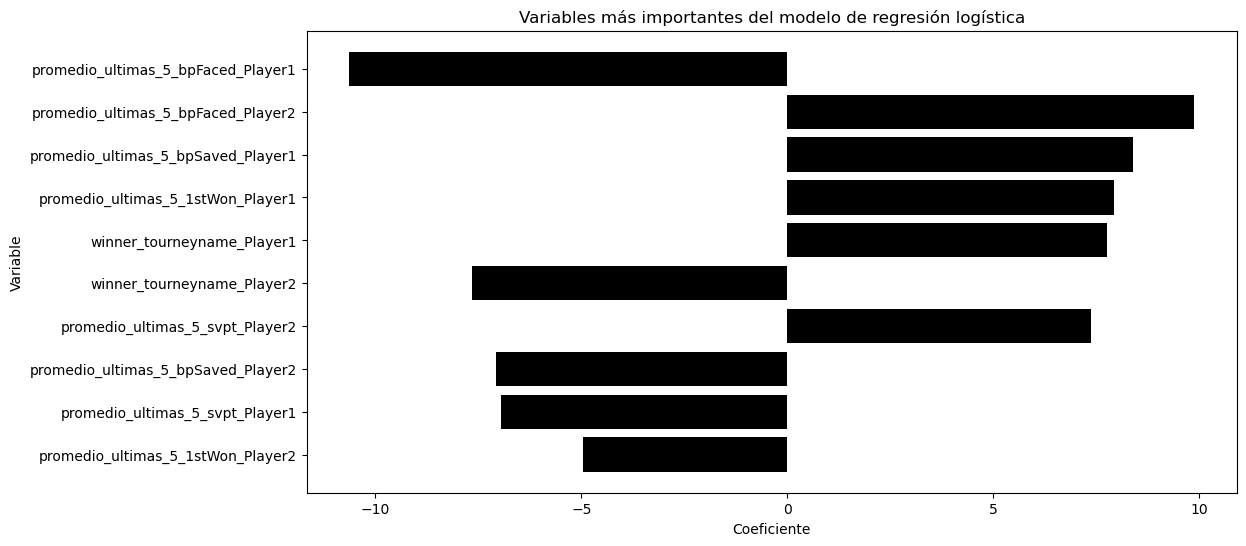

In [44]:
import matplotlib.pyplot as plt

# Obtener las N variables más importantes (por ejemplo, las 10 primeras)
top_n = 10  # Puedes cambiar este valor según tus preferencias

# Seleccionar las primeras N filas del DataFrame de coeficientes
top_coeficients_df = coeficientes_df.head(top_n)

# Crear la gráfica de barras
plt.figure(figsize=(12, 6))
plt.barh(top_coeficients_df['Variable'], top_coeficients_df['Coeficiente'], color='black')
plt.xlabel('Coeficiente')
plt.ylabel('Variable')
plt.title('Variables más importantes del modelo de regresión logística')
plt.gca().invert_yaxis()  # Invertir el eje y para que las variables más importantes estén en la parte superior
plt.show()

## Decision tree

In [31]:
from sklearn.tree import DecisionTreeClassifier

# Define model
model = DecisionTreeClassifier()


# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'max_features': ['auto', 'sqrt', 'log2']
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.6918659339637894
Best Hyperparameters: {'max_features': 'auto', 'max_depth': 85}


In [32]:
# Prediction with best model from random search 
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.67      0.66      0.67      8209
           1       0.67      0.68      0.67      8237

    accuracy                           0.67     16446
   macro avg       0.67      0.67      0.67     16446
weighted avg       0.67      0.67      0.67     16446



## RandomForestClassifier

Random forest is an ensemble method. We use also random search grid for hyperparameter tuning.

In [33]:
# Define model
model = RandomForestClassifier()

# define evaluation
#gkf = GroupKFold(n_splits=3) if not spec as cv= in the randomized search default is 5 fold cv

# define search space
param_grid = {
    'max_depth': list(range(25, 100, 10)),
    'n_estimators': list(range(80, 200, 10))
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)



Best Score: 0.8075058709361252
Best Hyperparameters: {'n_estimators': 180, 'max_depth': 55}


In [34]:
# Prediction with best model from random search 
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      8209
           1       0.80      0.80      0.80      8237

    accuracy                           0.80     16446
   macro avg       0.80      0.80      0.80     16446
weighted avg       0.80      0.80      0.80     16446



# ADABoost

In [35]:
# Define model
model = AdaBoostClassifier()

# define evaluation
#gkf = GroupKFold(n_splits=3) if not spec as cv= in the randomized search default is 5 fold cv

# define search space
param_grid = {
    'n_estimators': list(range(80, 200, 10))
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)


Best Score: 0.8176589701641422
Best Hyperparameters: {'n_estimators': 180}


In [36]:
# Prediction with best model from random search 
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      8209
           1       0.81      0.82      0.81      8237

    accuracy                           0.81     16446
   macro avg       0.81      0.81      0.81     16446
weighted avg       0.81      0.81      0.81     16446



# Logit Boost

In [37]:
import logitboost as lb
# Define model
model = lb.LogitBoost()

# define search space
param_grid = {
    'n_estimators': list(range(80, 200, 10))
}

search = RandomizedSearchCV(model, param_grid, n_iter=5, cv=10, scoring='accuracy', n_jobs=-1, random_state=1)

# execute search
result = search.fit(X_train, y_train)
# summarize result
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: 0.819905654096843
Best Hyperparameters: {'n_estimators': 180}


In [38]:
# Prediction with best model from random search 
best_random = result.best_estimator_

y_pred_test = best_random.predict(X_test)
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81      8209
           1       0.81      0.82      0.81      8237

    accuracy                           0.81     16446
   macro avg       0.81      0.81      0.81     16446
weighted avg       0.81      0.81      0.81     16446



## Neural Network

In [39]:
# import tensorflow
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import Input
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense


# use keras API
model = tf.keras.Sequential()

# determine the number of input features
n_features = X_train.shape[1]
# define model
model = Sequential()
model.add(Input(shape=X_train.shape[1]))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.4))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
model.add(Dense(50, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.6))
model.add(Dense(1, activation='sigmoid'))

In [40]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=50, batch_size=128)
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/50
261/261 [==============================] - 2s 3ms/step - loss: 0.6263 - accuracy: 0.6341
Epoch 2/50
261/261 [==============================] - 1s 3ms/step - loss: 0.4849 - accuracy: 0.7750
Epoch 3/50
261/261 [==============================] - 1s 3ms/step - loss: 0.4442 - accuracy: 0.7959
Epoch 4/50
261/261 [==============================] - 1s 3ms/step - loss: 0.4243 - accuracy: 0.8033
Epoch 5/50
261/261 [==============================] - 1s 4ms/step - loss: 0.4130 - accuracy: 0.8092
Epoch 6/50
261/261 [==============================] - 1s 3ms/step - loss: 0.4054 - accuracy: 0.8134
Epoch 7/50
261/261 [==============================] - 1s 3ms/step - loss: 0.3929 - accuracy: 0.8173
Epoch 8/50
261/261 [==============================] - 1s 3ms/step - loss: 0.3942 - accuracy: 0.8184
Epoch 9/50
261/261 [==============================] - 1s 3ms/step - loss: 0.3873 - accuracy: 0.8204
Epoch 10/50
261/261 [==============================] - 1s 3ms/step - loss: 0.3830 - accuracy: 0.8211

In [41]:
y_pred_test = model.predict(X_test)
y_pred_test = [int(i > .5) for i in y_pred_test]

print(classification_report(y_test, y_pred_test))


514/514 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

           0       0.81      0.78      0.80      8209
           1       0.79      0.82      0.81      8237

    accuracy                           0.80     16446
   macro avg       0.80      0.80      0.80     16446
weighted avg       0.80      0.80      0.80     16446

